<a href="https://colab.research.google.com/github/lisanyambere/lisanyambere/blob/main/Predicting_Diabetes_using_Logistic_regression%2CNB_and_Decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
##Importing the dataset
data=pd.read_csv('/content/drive/MyDrive/diabetes.csv')

In [ ]:
##Exploring the data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.shape

(768, 9)

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: xlabel='Outcome', ylabel='Pregnancies'>

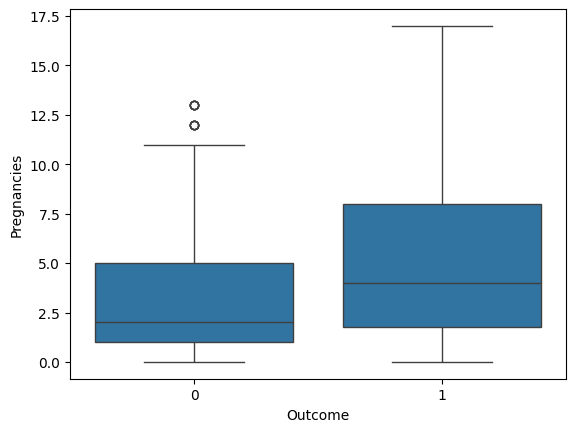

In [ ]:
##checking for outliers
#pregnancies
sns.boxplot(x='Outcome',y='Pregnancies',data=data)

<Axes: xlabel='Outcome', ylabel='Glucose'>

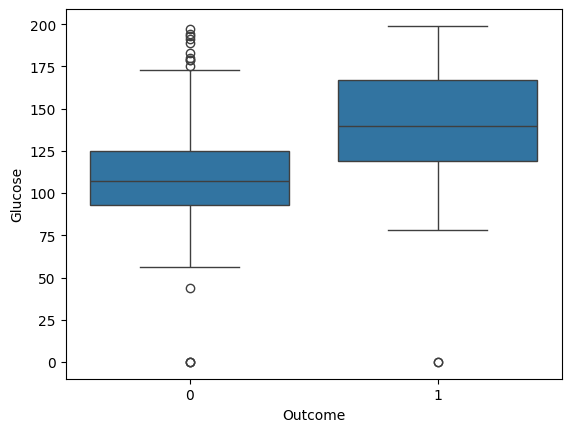

In [ ]:
#Glucose
sns.boxplot(x='Outcome',y='Glucose',data=data)

<Axes: xlabel='Outcome', ylabel='BloodPressure'>

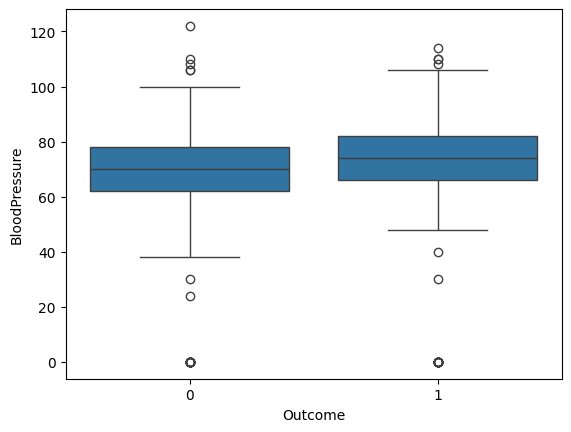

In [ ]:
#BloodPressure
sns.boxplot(x='Outcome',y='BloodPressure',data=data)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<Axes: >

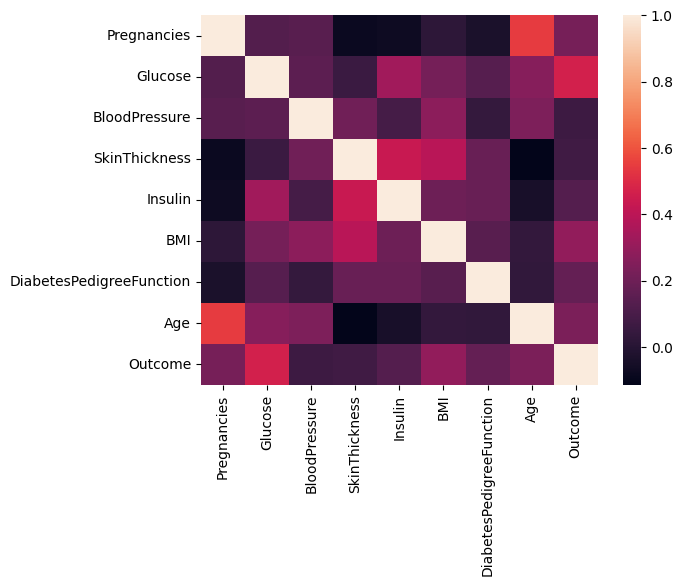

In [ ]:
##correlation
correlation=data.corr()
print(correlation)
sns.heatmap(correlation)

In [ ]:
##
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
#Splitting data
x=data.drop('Outcome',axis=1)
y=data['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=103)


In [ ]:
##logistic regression
log_model=LogisticRegression(max_iter=1000)
#training
log_model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
#predicting
y_pred=log_model.predict(x_test)

In [ ]:
#evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[130  21]
 [ 42  38]]
              precision    recall  f1-score   support

           0       0.76      0.86      0.80       151
           1       0.64      0.47      0.55        80

    accuracy                           0.73       231
   macro avg       0.70      0.67      0.68       231
weighted avg       0.72      0.73      0.72       231

Accuracy: 0.7272727272727273


In [ ]:
##Naive Bayes classifier
nb_classifier = GaussianNB()
#training
nb_classifier.fit(x_train,y_train)


GaussianNB()

In [ ]:
#predicting
y_predNB=nb_classifier.predict(x_test)

In [ ]:
#evaluation
print(confusion_matrix(y_test, y_predNB))
print(classification_report(y_test, y_predNB))
print("Accuracy:", accuracy_score(y_test, y_predNB))

[[127  24]
 [ 37  43]]
              precision    recall  f1-score   support

           0       0.77      0.84      0.81       151
           1       0.64      0.54      0.59        80

    accuracy                           0.74       231
   macro avg       0.71      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231

Accuracy: 0.7359307359307359


In [ ]:
##Decision tree classifier
tree_model=DecisionTreeClassifier(random_state=123)

In [ ]:
#training
tree_model.fit(x_train,y_train)
#prediciting
y_predTree=tree_model.predict(x_test)

In [ ]:
#evaluation
print(confusion_matrix(y_test, y_predTree))
print(classification_report(y_test, y_predTree))
print("Accuracy:", accuracy_score(y_test, y_predTree))

[[128  23]
 [ 43  37]]
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       151
           1       0.62      0.46      0.53        80

    accuracy                           0.71       231
   macro avg       0.68      0.66      0.66       231
weighted avg       0.70      0.71      0.70       231

Accuracy: 0.7142857142857143


The naive Bayes classifier performs better compared to the logistic regression and the decision tree classifier